In [1]:
#hierarchical agglomeratic clustering: Complete linkage
#import libraries
import numpy as np 
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

In [44]:
points_2 = pd.read_csv("C:/Users/ManasiAdmin/Desktop/College stuff/Semester-6/Information Retreival Semester-6/Agglomeratic_clustering/dataset/points_2.csv", names=['x0', 'x1'])

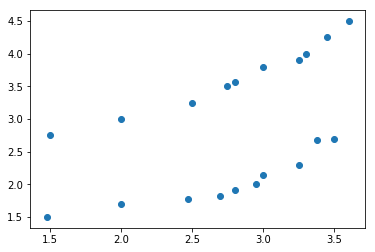

In [59]:
plt.scatter(points_2['x0'],points_2['x1'])

In [54]:
def completelink_distance(clusters ,cluster_num):
    while len(clusters) is not cluster_num:
        # Clustering           (
        closest_distance=clust_1=clust_2 = math.inf
        # going through each cluster except second last
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]):  
                furthest_cluster_dist = -1

                for point_id,point in enumerate(cluster): 
                    for point2_id, point2 in enumerate(cluster2):
# make sure that our furthest distance holds
                        if furthest_cluster_dist < distance.euclidean(point,point2): 
                            furthest_cluster_dist = distance.euclidean(point,point2)
#Furthest distance need to be minimized
                if furthest_cluster_dist < closest_distance:
                    closest_distance = furthest_cluster_dist
                    clust_1 = cluster_id
                    clust_2 = cluster2_id+cluster_id+1
               
       
        clusters[clust_1].extend(clusters[clust_2]) 
       #Cluster once again 
        clusters.pop(clust_2) 
    return(clusters)

In [56]:
#Hierarchical agglomeratic clustering for multiple linkage function definition
def agglomeratic(data, cluster_num, metric = 'complete'):
    # initialize every point as a cluster
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row['x0'], row['x1']]])
    if metric is 'complete':
        return completelink_distance(init_clusters, cluster_num)

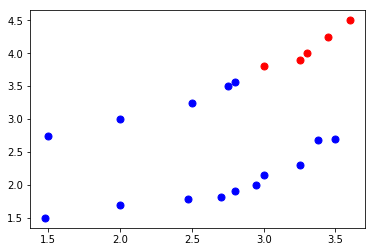

In [60]:
clusters = agglomeratic(points_1,2)
colors = ['blue', 'red']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=7, color=colors[cluster_index])